In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
import pickle

In [30]:
data = pd.read_csv("egypt_tourist_locations.csv")
# data.sort_values(by=['location_id'], inplace=True)
data.head()

,location_id,location_name,category,location,latitude,longitude,rating,user_id
0,1001,Pyramids of Giza,Historical Landmark,Giza,29.9792,31.1342,4.5,1
1,1002,Karnak Temple,Landmark,Luxor,25.7188,32.6573,4.6,1
2,1003,Valley of the Kings,Historical Landmark,Luxor,25.7401,32.6012,4.7,1
3,1004,Abu Simbel,Historical Landmark,Aswan,22.3375,31.6258,4.8,1
4,1005,Muizz Street,Market,Cairo,30.0404,31.2494,4.4,1


# ***Preprocessing***

In [31]:
# allPlaces = {place: idx*100 for idx, place in enumerate(data.location_name, start=1)}
# data["location_id"] = data["location_name"].apply(lambda x: allPlaces[x])

In [32]:
X, y = data["category"], data["location_name"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [33]:
vectorizer = TfidfVectorizer(stop_words="english", max_df=0.7)
X_train_vecorizered = vectorizer.fit_transform(X_train)
X_test_vecorizered = vectorizer.transform(X_test)

# ***Visualizations***

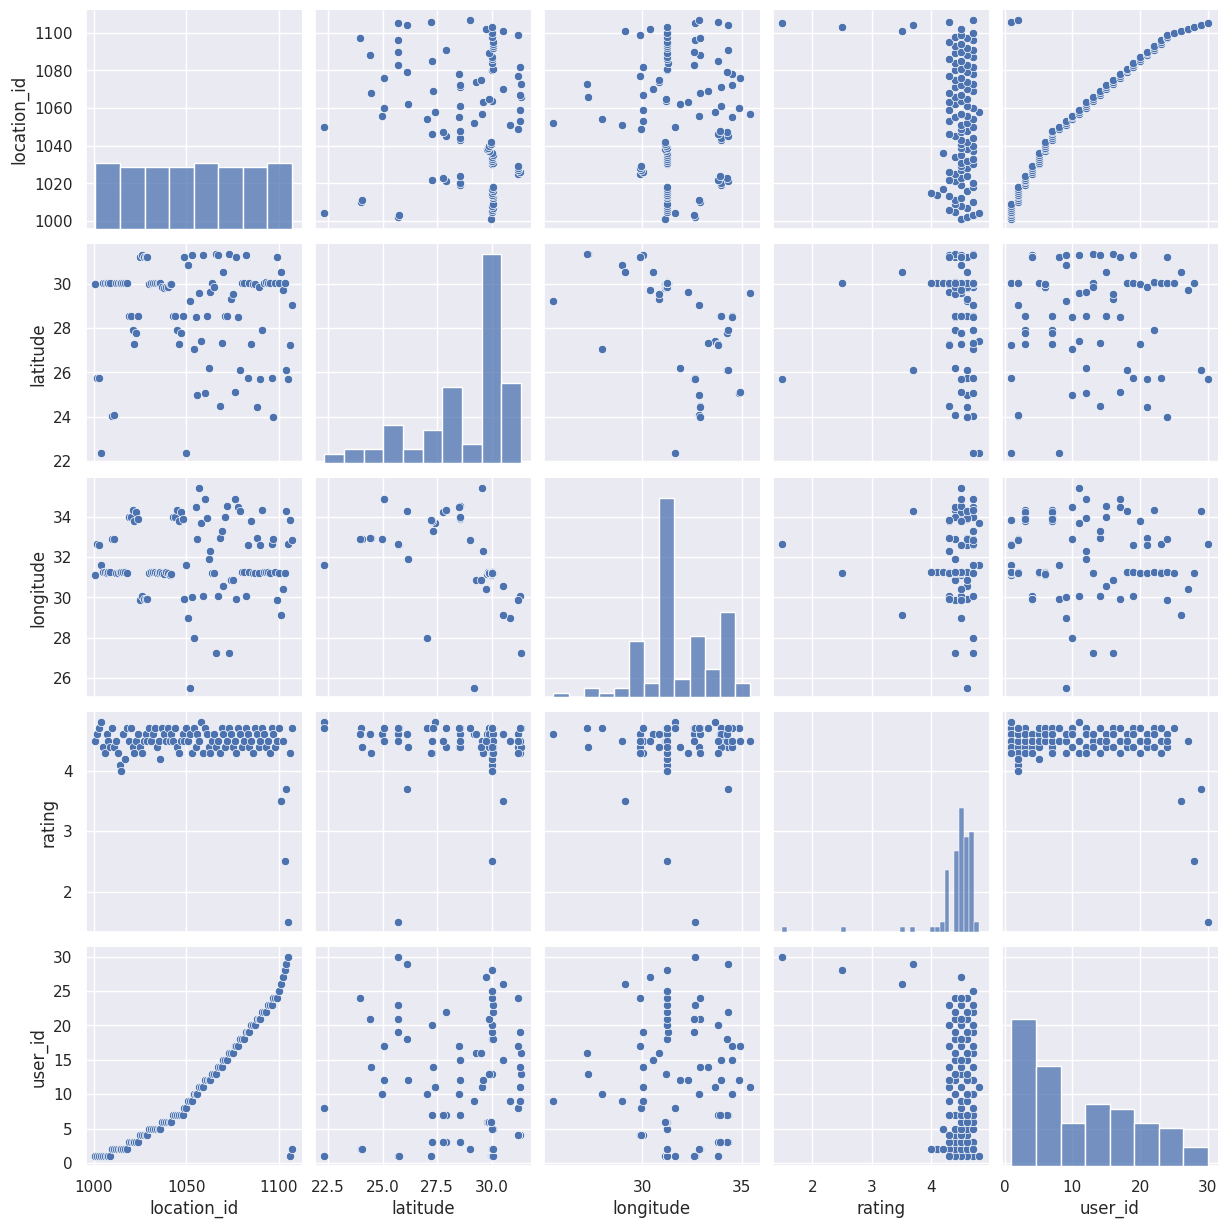

In [34]:
sns.pairplot(data)

<ipython-input-35-40c7afc9c415>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr().sort_values(by="rating"), annot=True)


<Axes: >

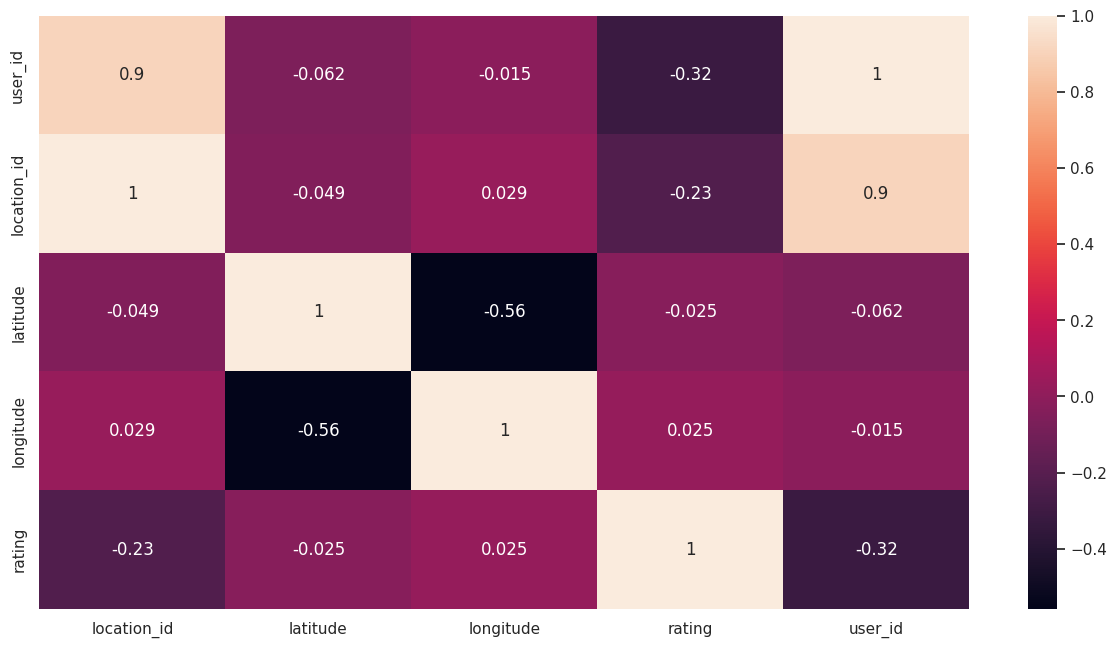

In [35]:
# sns.heatmap(data.corr(), annot=True)
sns.heatmap(data.corr().sort_values(by="rating"), annot=True)

<Axes: xlabel='user_id', ylabel='category'>

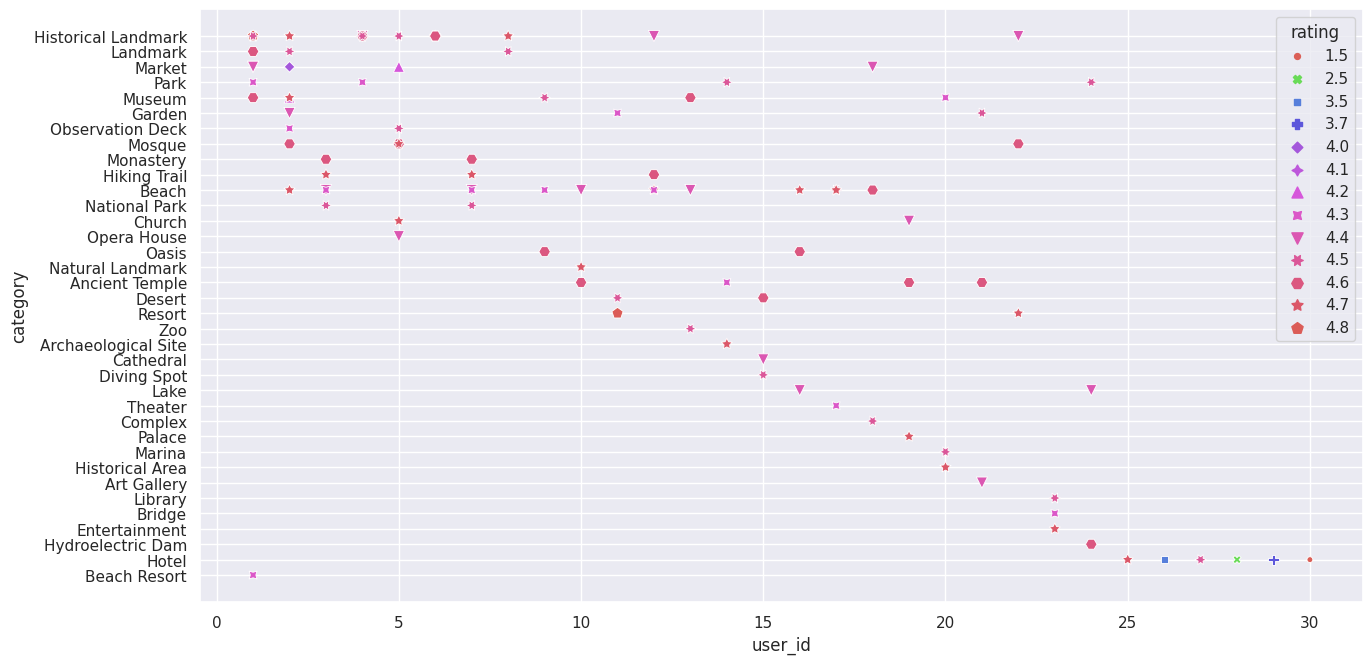

In [36]:
sns.set(rc={'figure.figsize':(15, 7.7)})
sns.scatterplot(data, x='user_id', y='category', hue='rating', size="rating", palette="hls", style="rating", legend='full')

<Axes: xlabel='user_id', ylabel='category'>

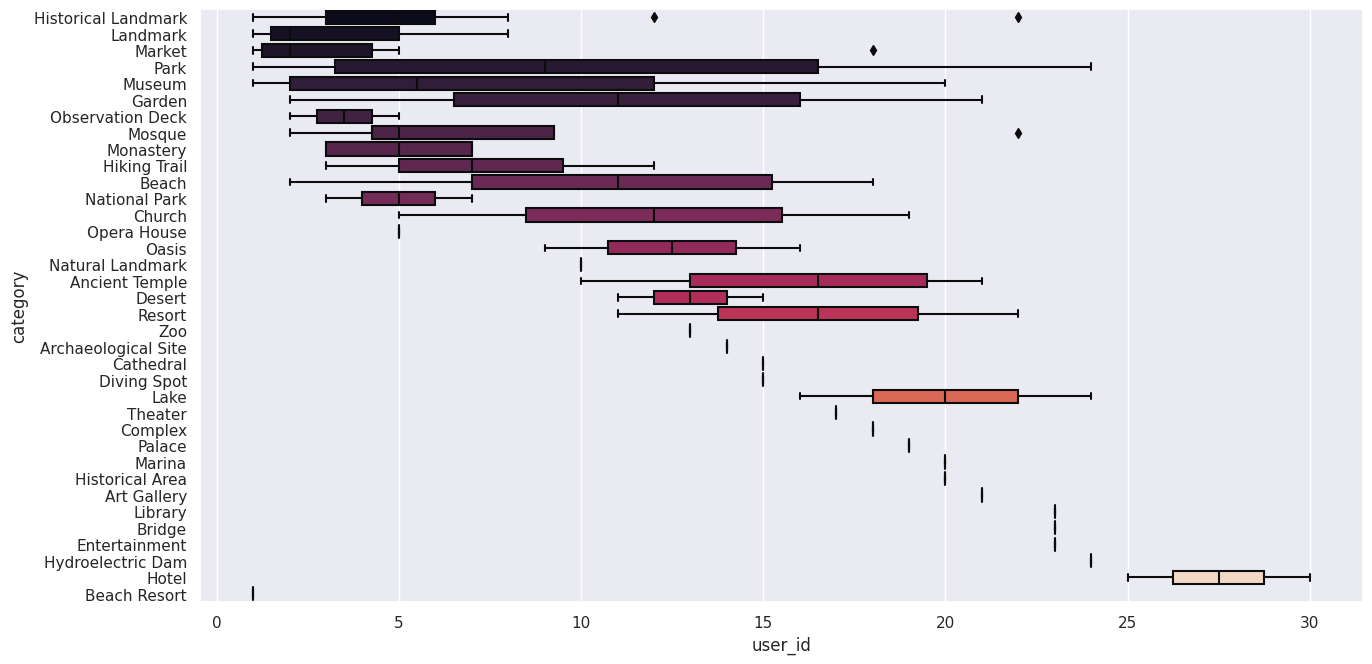

In [37]:
sns.boxplot(x='user_id', y='category', data=data, palette='rocket')

<ipython-input-38-5fa4141a3a61>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['user_id'], kde=False, color='m', bins=50)


<Axes: xlabel='user_id'>

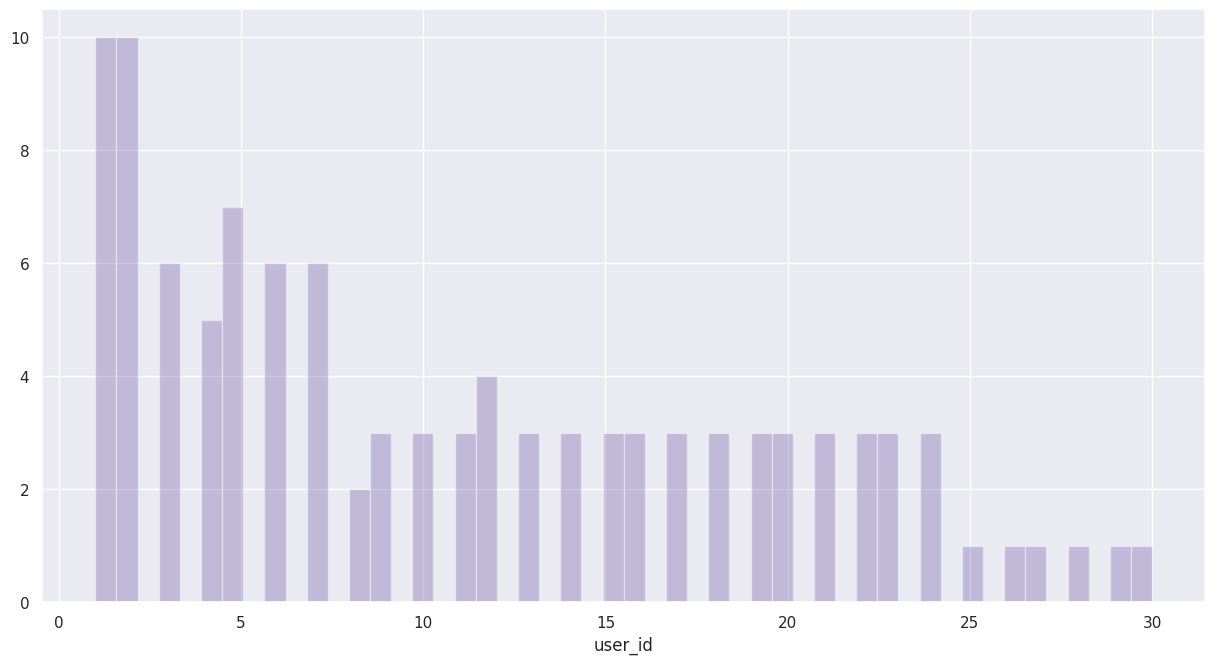

In [38]:
sns.distplot(data['user_id'], kde=False, color='m', bins=50)

array([[<Axes: title={'center': 'location_id'}>,
        <Axes: title={'center': 'rating'}>],
       [<Axes: title={'center': 'user_id'}>, <Axes: >]], dtype=object)

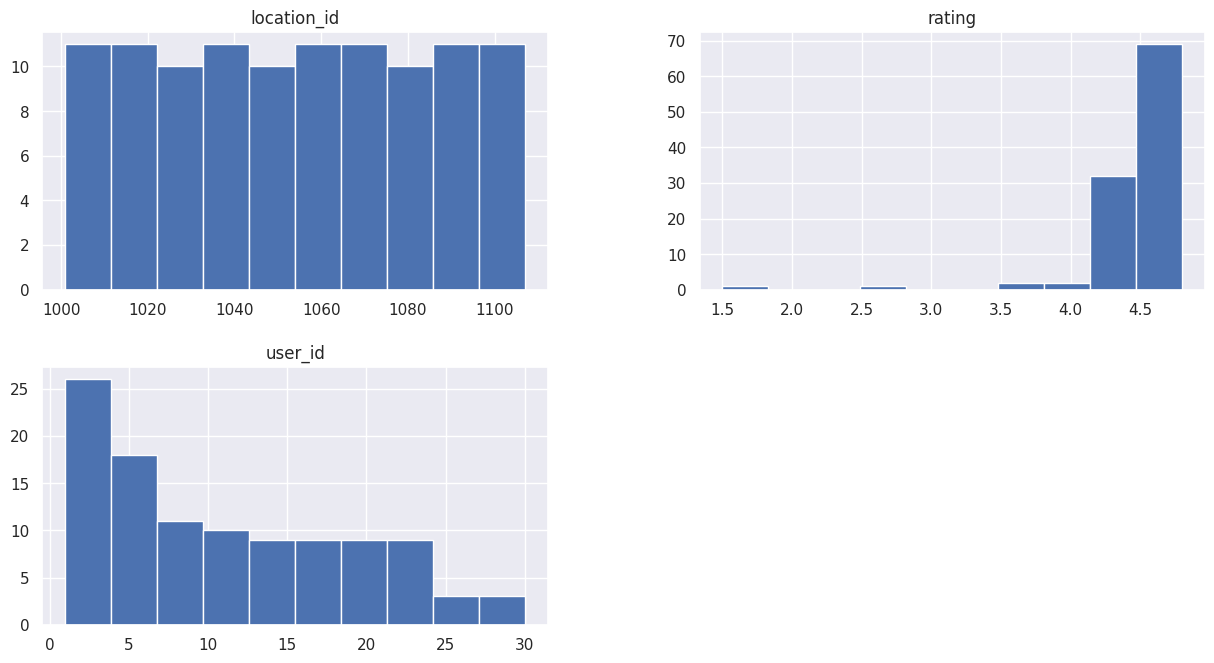

In [39]:
selected_data = data[["location_id", "rating", "user_id"]]
selected_data.hist()

In [40]:
data.isnull().sum()

location_id      0
location_name    0
category         0
location         0
latitude         0
longitude        0
rating           0
user_id          0
dtype: int64

In [18]:
data["location"].value_counts()

Cairo              31
Alexandria         13
Giza                9
Aswan               7
Luxor               7
Sinai               6
Sharm El Sheikh     5
Hurghada            5
Dahab               3
Red Sea             3
Marsa Matruh        2
Marsa Alam          2
Fayoum              2
El Alamein          1
Farafra             1
Edfu                1
Wadi Rum            1
Sohag               1
Ras Sedr            1
Suez                1
Natron Valley       1
Mersa Matruh        1
Mersa Alam          1
El-Quseir           1
Faiyum              1
Name: location, dtype: int64

In [44]:
data[data.user_id == 7]["location"].value_counts()

Sinai              2
Sharm El Sheikh    2
Hurghada           1
Red Sea            1
Name: location, dtype: int64

# ***train***
---



In [45]:
"""
model = LinearSVC(random_state=0, tol=1e-5)
model.fit(X_test_vecorizered, y_test)
"""
model = make_pipeline(StandardScaler(with_mean=False), LinearSVC(random_state=0, tol=1e-5))
model.fit(X_test_vecorizered, y_test)

Pipeline(steps=[('standardscaler', StandardScaler(with_mean=False)),
                ('linearsvc', LinearSVC(random_state=0, tol=1e-05))])

In [48]:
vectorized_text = vectorizer.transform(["Church", "Beach", "Historical Landmark", "Market"])
y_pred = model.predict(vectorized_text)
model_accuracy = round(model.score(X_test_vecorizered, y_test)*100, 2)
print('Accuracy:', model_accuracy, "%")


Accuracy: 93.64 %


# ***save pkl file***

In [49]:
pickle.dump(model, open('model.pkl', 'wb'))
pickle.dump(vectorizer, open('vectorizer.pkl', 'wb'))

Load the model and vectorizer

In [50]:
loaded_model = pickle.load(open('model.pkl', 'rb'))
loaded_vectorizer = pickle.load(open('vectorizer.pkl', 'rb'))

In [51]:
def recommend_places_for_user(user_id):
    user_data = data[data["user_id"] == user_id]
    categories = user_data["category"].unique()
    vectorized_text = loaded_vectorizer.transform(categories)
    predictions = loaded_model.predict(vectorized_text)
    return predictions

In [52]:
user_id = int(input("Enter {user_id}: "))
recommended_places = recommend_places_for_user(user_id)

print(f"Recommended Places for User {user_id}:")
places_dict = {}
for category, place in zip(data[data["user_id"] == user_id]["category"], recommended_places):
    if category not in places_dict:
        places_dict[category] = [place]
    else:
        places_dict[category].append(place)


# recommended_places
places_dict

Enter {user_id}: 7
Recommended Places for User 7:


{'Monastery': ["St. Anthony's Monastery"],
 'Hiking Trail': ['Dahab Blue Hole'],
 'Beach': ['Mersa Alam Beach', 'Ras Mohammed National Park']}

In [56]:
model_accuracy = round(loaded_model.score(X_test_vecorizered, y_test) * 100, 2)
print('Accuracy:', model_accuracy, "%")

Accuracy: 95.45 %
